In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

# STEM for Creatives Week 4 - Audio, Splicing and For Loops

This week we will see how audio is represented on computers, how we can cut it up and rearrange it, and how we can inspect or edit a sequence but write very little code to do it!

## How does music exist?

There are two main ways we can represent music

Either **symbolically**, for example a score. This is a representation of how some music should be played (for example some notes at a given time)

Or, as the raw sound itself


## Audio files are just arrays 

Sound in the physical world is just __vibrations__ in air. Our ear picks these up, transfers them to mechanical motion, then electrical signals!

Precomputer (analog), we could record, replay, and amplify this using electrical cables 

In a digital world, we **can't represent a continuous signal**. Instead,  we __sample__ this signal (take a measurement at short intervals). 

This leaves us with a list of numbers (normally between -1 and 1) that represent some audio. 

## Sequences

Both **symbolic** and **raw audio** representations of music are sequential, so today we'll look at some coding tools for working with data like this!


## Librosa - Audio in Python

### Loading Samples

First, we're just going to use it to read in sound files, and maybe mess with their sample rates.

Using ```librosa.load()```, we get the sample data back as an array, as well as the sample rate of the file.

We'll then show you how you can manipulate the array and play it back and get some cool audio effects.

In [2]:
#Install he library
!pip install librosa

In [4]:
#Loading in sample file, returns an array containing the samples, as the sample rate 
drums, sr = librosa.load('audio/drums0.wav')

In [5]:
#How many samples? What sample rate? Unless you specify, librosa will automatically
#convert you sample to 22050
print(drums.shape, sr)
#How many seconds is that?
print(drums.shape[0] / sr)

(124518,) 22050
5.647074829931973


In [6]:
#Define a custom function to show and play an audio file
def show_audio(y, sr=44100, normalise=True):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.set_ylim(-1,1)
    librosa.display.waveshow(y, sr=sr, ax=ax)
    return ipd.Audio(y, rate=sr, normalize=normalise, autoplay=True)

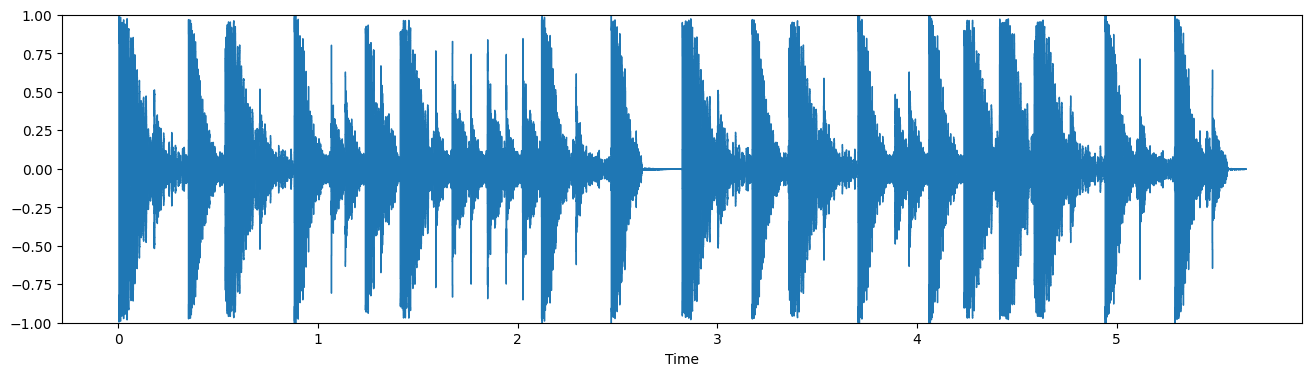

In [7]:
#Play the samples
show_audio(drums, sr)

## Lots of changes, little code

Obviously when we want to analyse or manipulate this audio file, with **44100 values a second** we dont want to have to write code to change each sample by hand!

Thats too much man.

We'll look at 3 ways you can apply operations to all or part of an array using not much code at all!

1. Traditional maths, either with a single number, or another list of the same length


2. Splicing ranges 


3. For Loops

### Maths with Audio Files

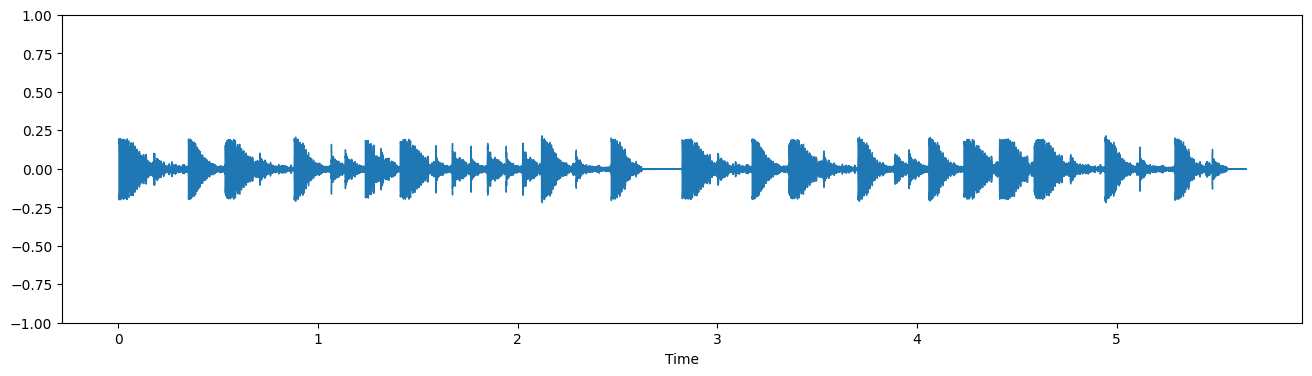

In [8]:
#We can change the volume
#Multiply all the samples by 0.2
audio_output = drums * 0.2
show_audio(audio_output, sr, False)

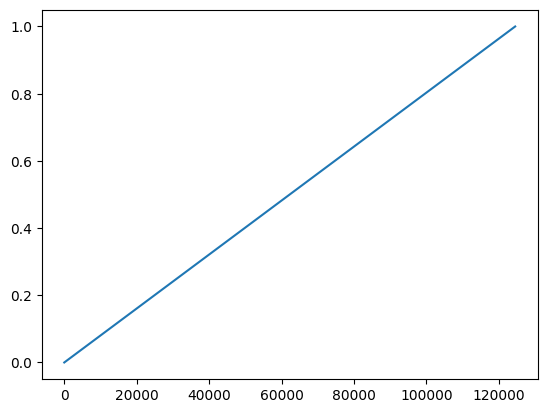

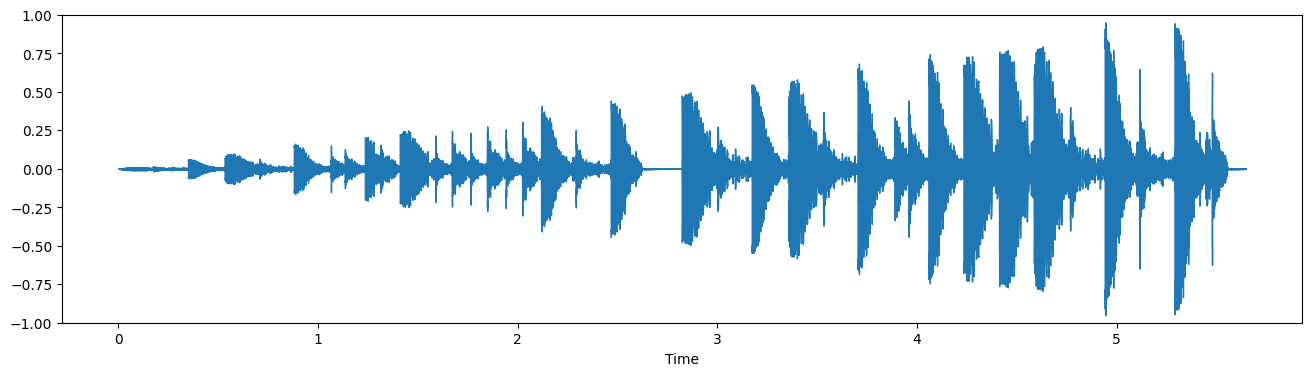

In [9]:
#We can fade in
#Multiply the samples array by another array containing a ramp from 0->1
ramp = np.linspace(0,1,len(drums))
audio_output = drums * ramp
plt.plot(ramp)
show_audio(audio_output, sr)

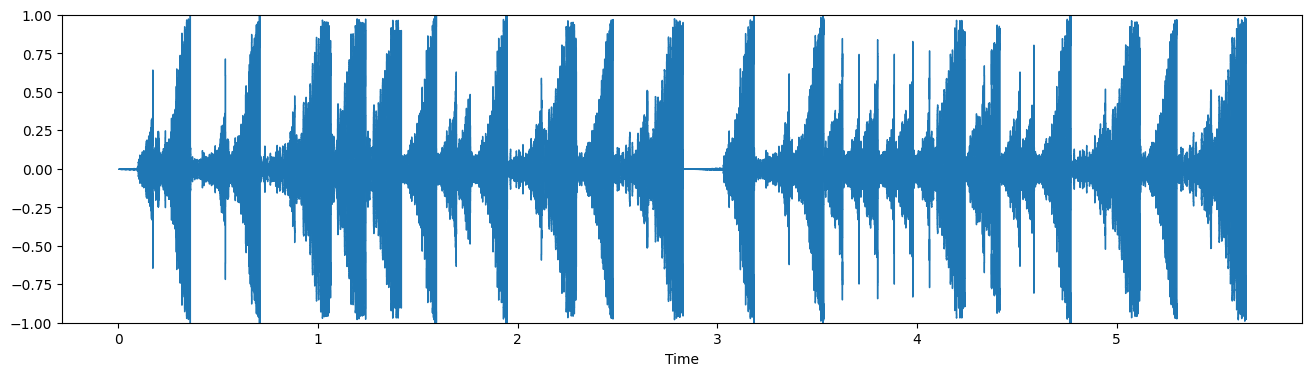

In [10]:
#We can play the sound backwards
#Just reverse the array
audio_output = np.flip(drums)
show_audio(audio_output, sr)

### Changing the playback rate 

We can change the sample rate and this effects the length and the pitch of an audio file. This is analagous to playing a record player faster or slower. 

Essentially, we take **same numbers / samples** and either interpret them to represent **more or less time**

For example, if the sample rate is 44100Hz, then 44100 samples represents 1 second of sound. At 22050Hz, 44100 samples represents 2 seconds of sound

Taking the **same numbers / samples** and playing at a lower sample rate, means we take longer to play through the samples and it sounds lower.

Taking the **same numbers / samples** and playing at a higher sample rate, means we move through the samples quicker and it sounds higher.


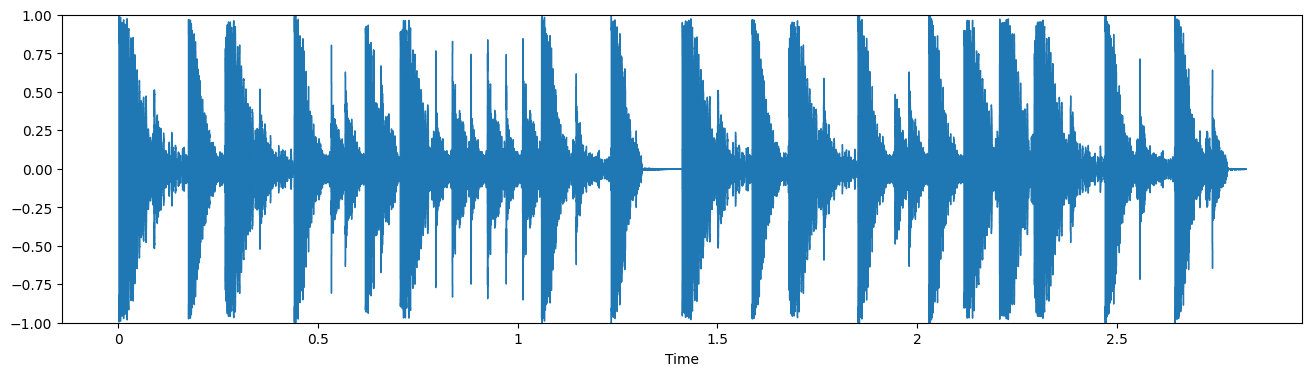

In [11]:
#We can play at a different speed (higher sample rate = faster playback)
#Also half the length (look at the x axis!)
show_audio(drums, sr*2)

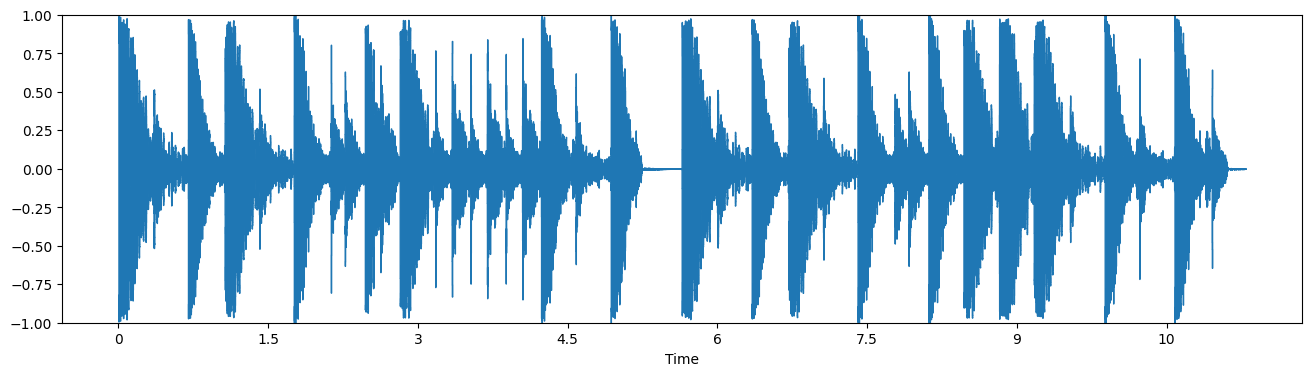

In [12]:
#We can play at a different speed (lower sample rate = slower playback)
#Also, twice the length (look at the x axis!)
show_audio(drums, sr/2)

## Splicing 

Cut and paste has a long history in music editting in the studio. People used to physically cut up tape in days before computers!

In general with arrays, we can replace values of an array with another array of the same size

Instead of giving an exact index for a row or column (getting us just one point), we can use the `:` notation to say "all of this row/column"

### Columns

In [13]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Replace all values of second column with new array 
a[:,1] = np.arange(3)
print("after \n", a)

before 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
after 
 [[1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 2. 1. 1. 1. 1. 1. 1. 1. 1.]]


### Rows

In [14]:
a = np.ones(30).reshape(3,10)
print("before \n", a)
#Replace all values of second row with new array 
a[1,:] = np.arange(10)
print("after \n", a)

before 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
after 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


### Different sizes

If the data we want to replace is **not the same length** as the row or column we want to insert it over, we can **specify and exact range**. Again, this must be the same size

In [15]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Replace first 5 values of second row with new array 
a[1,0:5] = np.arange(5)
print("after \n", a)

before 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
after 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 2. 3. 4. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


### Or if used with another number **after** we say "everything up til this index"

In [16]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Replace last 5 values of second row with new array 
a[1,5:] = np.arange(5)
print("after \n", a)

before 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
after 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 2. 3. 4.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


### Or if used with another number **before** we say "everything before this index"

In [17]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Take first 5 values of second row and multiply by 100, then put back into array
a[1,:5] = a[1,:5]*100
print("after \n", a)

before 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
after 
 [[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [100. 100. 100. 100. 100.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]]


In [18]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Take last 5 values of second row and multiply by another array of the same size, then put back into array
a[1,5:] = a[1,5:] * [1,4,8,16,32]
print("after \n", a)

before 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
after 
 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  4.  8. 16. 32.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


### Coding Tip!

If you want to be clever and make the code work for any length of array, you can use the ``len()`` function when defining your ranges

In [19]:
a = np.ones(30).reshape(3,10)
print("before \n",a)
#Take last 5 values of second row and multiply by another array of the same size, then put back into array
b = [1,4,8,16,32]
a[1,:len(b)] = a[1,:len(b)] * b
print("after \n", a)

before 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
after 
 [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  4.  8. 16. 32.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


## Once more, with feeling (and audio)

We're going to start chopping up our sample and putting it back together. In order to do this its nice to have an idea of musical intervals. 

This drum beat is two bars, each consisting of 4 beats. We can work out these intervals in samples and then use this to chop up the drums!

As before, the new audio data we put in **must** be the **same length as the slot** we want to put it in.

In [20]:
#All the indexes we use are in SAMPLES
bar = len(drums)/2
#4 beats in a bar
beat = int(bar / 4)
#for semi-quavers (sq) in a beat
sq = int(beat / 4)
bar, beat, sq

(62259.0, 15564, 3891)

### Slicing out a section of audio

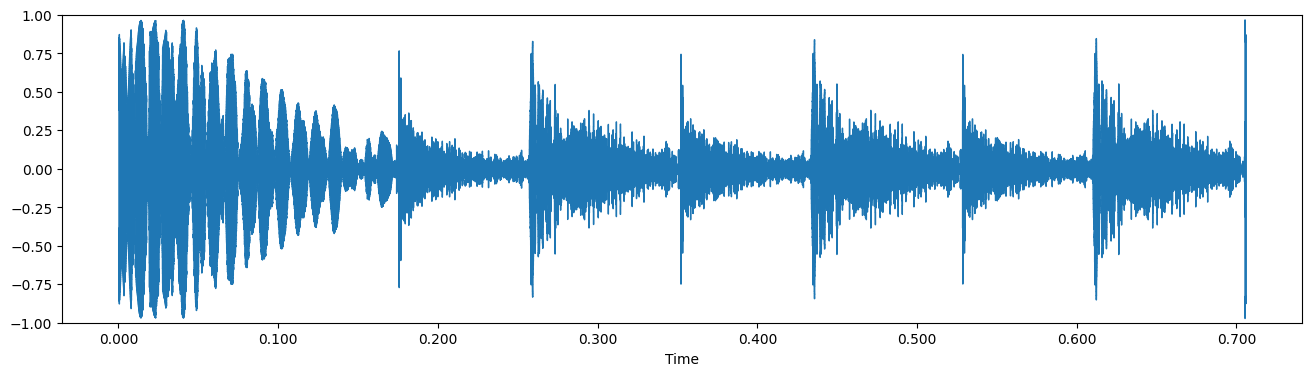

In [21]:
#take the drum roll that happens on the second beat. 
#Get audio data from beat*2 => beat*3 using the : audio_outputn
drum_roll = drums[beat*2:beat*3]
show_audio(drum_roll, sr)

### Overwritting it back into the original at a new place! 

replacing 15564 samples with 15564


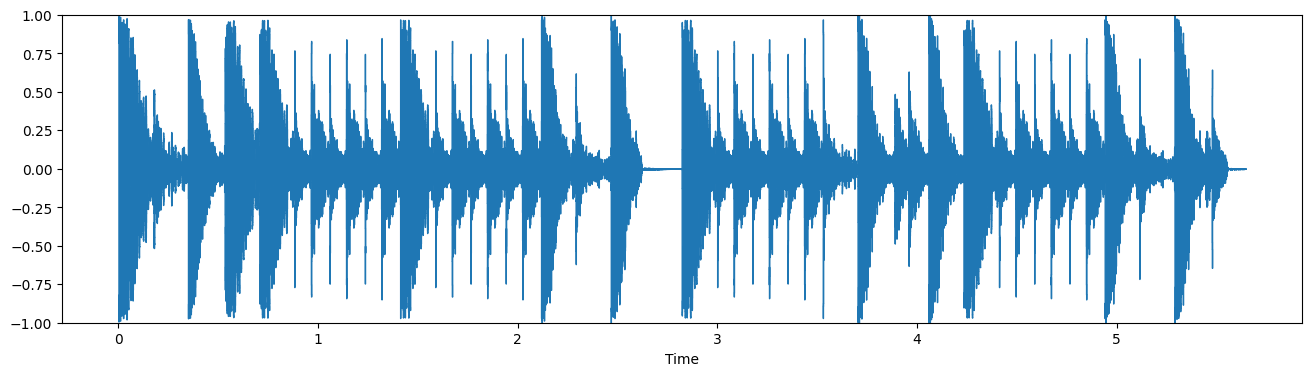

In [22]:
#first take the whole drum break (MUST COPY)
audio_output = drums.copy()
#Overwrite new locations in original with the drum roll
print("replacing " + str((beat*2) - (beat*1)) + " samples with " + str(len(drum_roll)))
audio_output[beat*1:beat*2] = drum_roll
audio_output[beat*4:beat*5] = drum_roll
audio_output[beat*6:beat*7] = drum_roll
show_audio(audio_output, sr)

### Reversing a section of audio

replacing 31128 samples with 31128


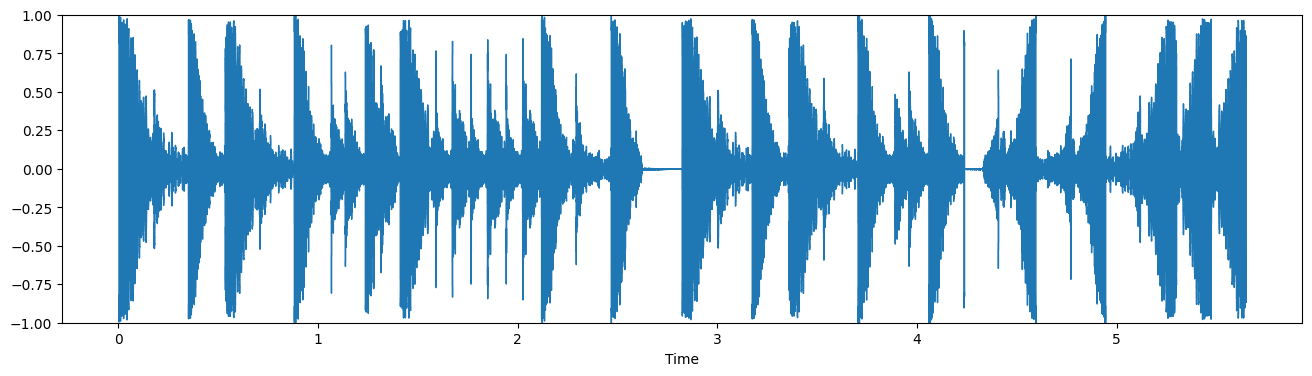

In [23]:
#first take the whole drum break (MUST COPY)
audio_output = drums.copy()
#reverse the last 2 beats
#overwrite the 2 lasts beats worth of audio data with the reverse of it
print("replacing " + str((beat*8) - (beat*6)) + " samples with " + str((beat*8) - (beat*6)))
audio_output[beat*6:beat*8] = np.flip(audio_output[beat*6:beat*8])
show_audio(audio_output, sr)

replacing 15564 samples with 15564


/var/folders/v7/r2vfsryx1_j9r9ztkdfc_z2m0000gn/T/ipykernel_44730/2847959353.py:6: FutureWarning: Pass orig_sr=22050, target_sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  low_kick = librosa.resample(kick, sr, sr*2)


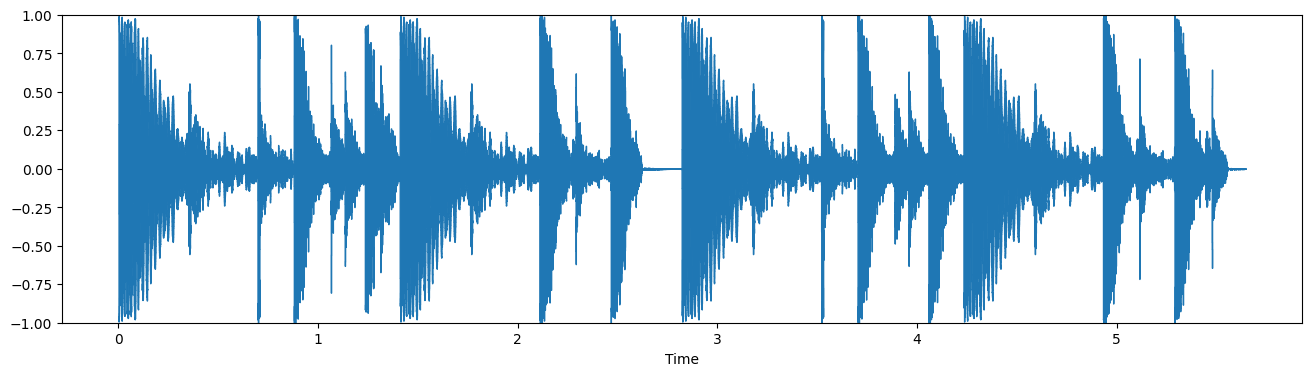

In [24]:
audio_output = drums.copy()
#Get first half beat
kick = drums[0:int(beat/2)]
#Slow to half speed, which also makes it twice as long
#Now a whole beat in length
low_kick = librosa.resample(kick, sr, sr*2)
print("replacing " + str((beat*(0+1)) - (beat*0)) + " samples with " + str(len(low_kick)))
for i in [0,2,4,6]:
    #Overwrite low_kick audio data on every other beat
    audio_output[beat*i:beat*(i+1)] = low_kick
show_audio(audio_output, sr)

### Multiple Samples

We'll now introduce some more samples and show how we can **combine** as well as **overwrite**. 

In [25]:
guitar, sr = librosa.load('audio/guitar.wav')
#guitar sample is twice as long so trim
half_guitar = guitar[0:len(drums)]

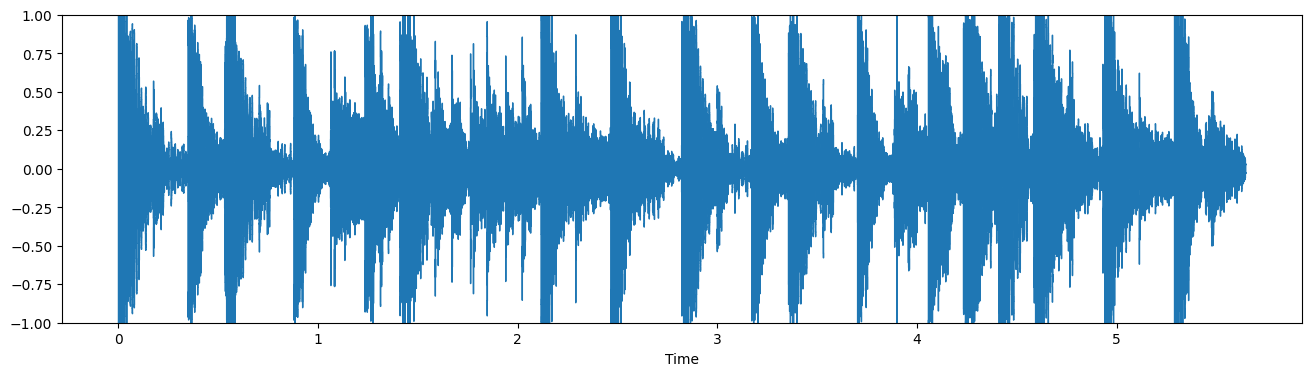

In [26]:
#Combine (using +) them together. NOT overwrite.
audio_output = drums + half_guitar
show_audio(audio_output, sr)

### Multi Channel

If we have a 2D array with two channels of audio, we can do stereo!

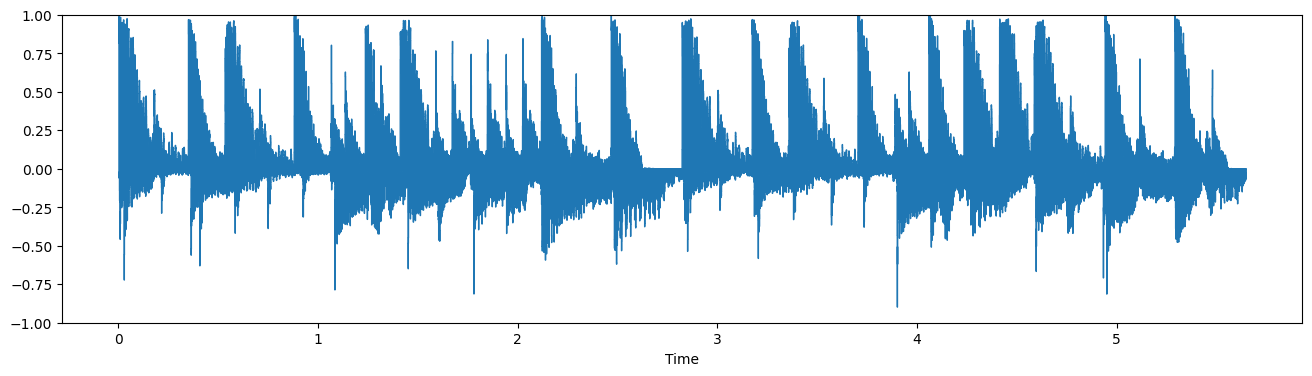

In [27]:
#Make an array with the two samples, one in each channel
#drums on left [0], guitar on right [1]
audio_output = np.array([drums,half_guitar])
show_audio(audio_output, sr)

## Putting it all together for some #algorave goodness

### Loops over time

We are going to start stringing some of these changes together into a **sequence** to make a longer audio composition through collaging **audio data** from existing audio files. 

Starting from a blank array to hold our new composition, we will step through at **musically meaningful intervals** and at each point decide what **audio data to add in**. 

For example, we could write some code to take the first beat of **4 different drum samples** and chain them together.

```
#step 1
my_track[0:beat] = multi_drums[0][0:beat]

#step 2
my_track[1*beat:beat*2] = multi_drums[1][0:beat]

#step 3
my_track[2*beat:beat*3] = multi_drums[2][0:beat]

#step 4
my_track[3*beat:] = multi_drums[3][0:beat]

```

However, if we want to do something over time and **not hand write new code every step**, we can use a control structure common in lots of coding, and especially useful in **time based media** 

* Audio


* Video 


* Games 


### For Loops (Again!)

The code underneath dictates what repeated actions we do with ``i`` each time and **must** be indented with a tab, otherwise Python will complain. 

This can be a single line code, or multiple lines. Every line that is indented will be included in the loop and executed each time.

`for i in array:
    do_something_with_i 
#end of loop
`
    
`for i in array:
     do_something_with_i
     do_something_else_with_i
     do_another_thing
#end of loop
`  

With this we can now write **one piece of code** that grabs some audio and places it in our **new track**, and get the ``for loop`` to execute this **multiple times**, each time **moving forwards** to a new position

In [48]:
#Load in 8 drum breaks
multi_drums = np.array([librosa.load('audio/drums' + str(i) +'.wav')[0] for i in range(8)])
print(multi_drums.shape)
#Load in 2 drum vocal samples
vocals = np.array([librosa.load('audio/vocal' + str(i) +'.wav')[0] for i in range(2)])

(8, 124518)


/var/folders/v7/r2vfsryx1_j9r9ztkdfc_z2m0000gn/T/ipykernel_44730/2695209072.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vocals = np.array([librosa.load('../audio/vocal' + str(i) +'.wav')[0] for i in range(2)])


In [50]:
multi_drums.shape

(8, 124518)

0 0 15564
1 15564 31128
2 31128 46692
3 46692 62256
4 62256 77820
5 77820 93384
6 93384 108948
7 108948 124512
finished, playing track


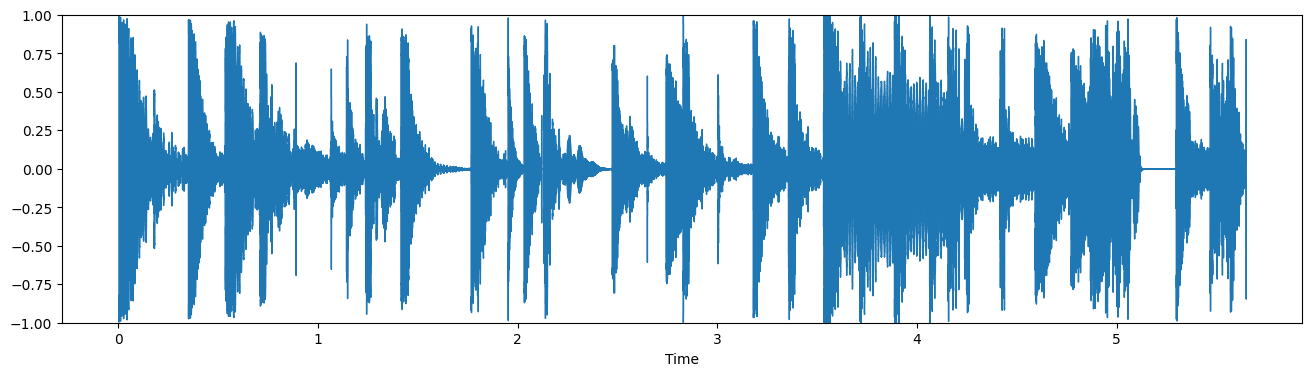

In [51]:
num_beats = 8
track_length = beat * num_beats
#Start with silence (0's). An array with one channels, with enough space to hold 1 bars worth of audio samples
my_track = np.zeros(track_length)
for i in range(num_beats):
    start = i * beat
    end = (i+1) * beat
    print(i, start, end)
    #Use i to pick a new insert position, and new source drum beat
    my_track[start:end] = multi_drums[i][0:beat]
print("finished, playing track")
show_audio(my_track, sr)

### Random Variation

In the track above, on every iteration of the ``for-loop`` we make **3 compositional choices**


1. Where to insert the audio into our blank new track


2. Which source drum beat to take the audio from 


3. Where in the source drum beat to take the audio from 


The first one we take from the `i` variable. It makes sense to keep this as we are using the `for-loop` to represent time moving forwards. 


The second and third, we have hardcoded, but it can be interesting to instead pick a ``random value``.

Now, **every iteration of the for loop** will chop a new drum beat a new place. We can make this go for as long as we want!

inserting from 4 0 15564
into 0 15564
inserting from 5 0 15564
into 15564 31128
inserting from 7 0 15564
into 31128 46692
inserting from 5 31128 46692
into 46692 62256
inserting from 4 15564 31128
into 62256 77820
inserting from 6 0 15564
into 77820 93384
inserting from 2 46692 62256
into 93384 108948
inserting from 4 15564 31128
into 108948 124512
finished, playing track


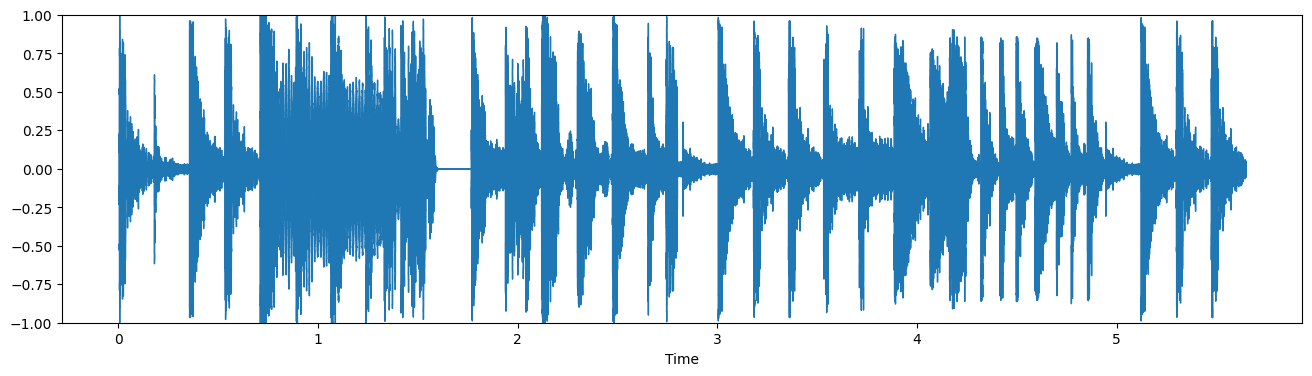

In [31]:
num_beats = 8
num_drums = len(multi_drums)
track_length = beat * num_beats

#Start with silence (0's)
my_track = np.zeros(track_length)

for i in range(num_beats):
    start = i * beat
    end = (i+1) * beat
    
    #get random drum beat (8 drums to choose from)
    source_drum = np.random.randint(num_drums)
    
    #get random start point (4 beats to choose from)
    
    source_drum_start = np.random.randint(4) * beat
    source_drum_end = source_drum_start + beat
    
    print("inserting from", source_drum, source_drum_start, source_drum_end)
    print("into", start, end)
    
    my_track[start:end] = multi_drums[source_drum][source_drum_start:source_drum_end]

print("finished, playing track")
show_audio(my_track, sr)

### (Pseudo) Random Numbers and Weighted Choices

The random method we have used generates from a **uniform distribution**, meaning that there is an equal chance that any of the possible numbers will be generated. 

We can see below that when we generate 10000 numbers, then plot it on a histogram, each bar is approximately the same. 

This is why when we use it for making choices in algorithms, we can be fairly sure about probability of certain actions happening e.g. 

```
#10% chance
if np.random.rand() > 0.9:
    do_something()
```

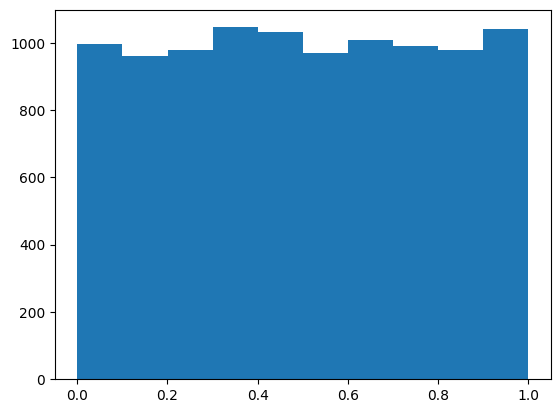

In [32]:
##Histogram of uniformly distributed random floats
a = plt.hist([np.random.rand() for i in range(10000)])

### A stochastic composition

Here we add use one `for-loop` with a bunch of different **probability based choices** inside. 

At each time step we some source audio, and some editting effects, and gradually build up our **generative composition**.

There is alot going on here! Have a go at reading through the code and see what you are able to follow!

### Composition 1

Here, we chop the guitar into 128 pieces and step through each one

We only update the start point of where we grad the audio from 20% of the time, so we get the repeated glitch sound

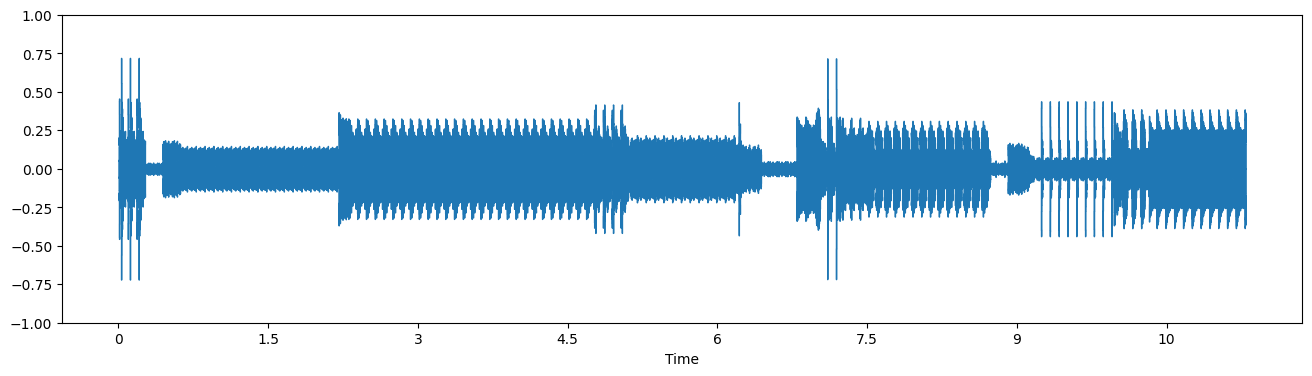

In [75]:
source_audio = guitar
track_length = len(source_audio)
num_chops = 64*2
chop_size = int(track_length/num_chops)

#Start with silence (0's)
audio_output = np.zeros(track_length)
cut_point = 0

for i in range(num_chops):
    
    insert_at = i * chop_size
    
    #Only update cut point 20% of the time
    if np.random.random() <0.2: 
        cut_point = insert_at
    
    #Copy across guitar audio into new track
    audio_output[insert_at:insert_at+chop_size] = source_audio[cut_point:cut_point+chop_size]

show_audio(audio_output, sr)

### Composition 2

Here, we update slightly so that we are not chopping all the time (and retain some of the original guitar, a little more tasteful)

We use a **boolean** (True/False) variable to determine whether we are currently chopping or not. 

If we are, there is a 70% chance we keep going

If we are not, there is a 30% chance we will start chopping

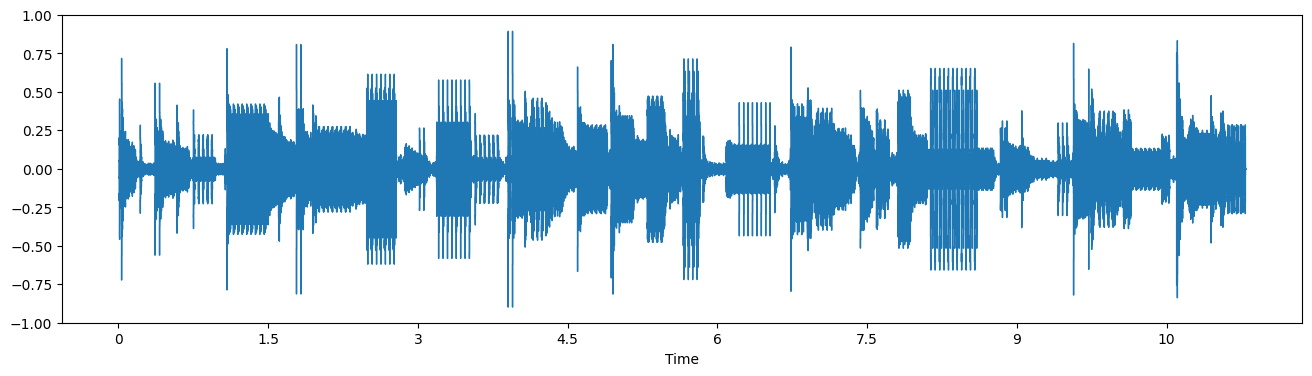

In [79]:
source_audio = guitar
track_length = len(source_audio)
#More chops for the same track length = shorter chops
num_chops = 64*2
chop_size = int(track_length/num_chops)

#Start with silence (0's)
audio_output = np.zeros(track_length)
cut_point = 0
chopping = False

for i in range(num_chops):
    
    insert_at = i * chop_size
    
    if chopping:
        #70% chance of keeping chopping if I already am
        chopping = np.random.random() < 0.6
    else:
        #If not chopping, just keep moving the point forwards
        cut_point = insert_at
        #And have a 30% chance of starting to chop again
        chopping = np.random.random() < 0.3
    
    
    #Copy across guitar audio into new track
    audio_output[insert_at:insert_at+chop_size] = source_audio[cut_point:cut_point+chop_size]

show_audio(audio_output, sr)

### Composition 3 

All the drums, plus some vocals and some speed changes!

/var/folders/v7/r2vfsryx1_j9r9ztkdfc_z2m0000gn/T/ipykernel_44730/1393665024.py:32: FutureWarning: Pass orig_sr=22050, target_sr=11025.0 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  new_drums = librosa.resample(new_drums, sr, sr/2)
/var/folders/v7/r2vfsryx1_j9r9ztkdfc_z2m0000gn/T/ipykernel_44730/1393665024.py:37: FutureWarning: Pass orig_sr=22050, target_sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  new_drums = librosa.resample(new_drums, sr, sr*2)


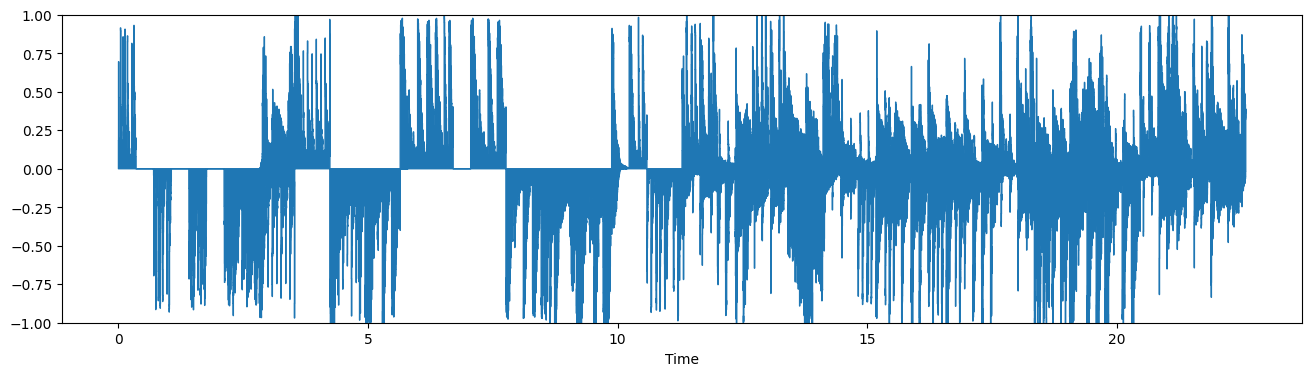

In [52]:
track_length = int(bar * 8)
#Start with silence (0's)
audio_output = np.array([np.zeros(track_length), np.zeros(track_length)])

#Length of each chop (smaller number is more frequent chops)
chop = 1/8
chop_size = int(len(multi_drums[0]) * chop)
n = int(track_length/chop_size)
#Pick a random drum break and location
drum_index = np.random.randint(len(multi_drums))
chop_at = np.random.randint(1/chop)*chop_size


for i in range(n):
    
    #65% chance of picking new drums
    if np.random.rand() > 0.35:
        #Pick a random drum break and location
        drum_index = np.random.randint(len(multi_drums))
        chop_at = np.random.randint(1/chop)*chop_size
        
    #Get a section of that drum break
    new_drums = multi_drums[drum_index, chop_at:chop_at+chop_size]
    
    #10% chance of reversing
    if np.random.rand() > 0.9:
        new_drums = np.flip(new_drums)
        
    #10% chance of speeding up
    if np.random.rand() > 0.9:
        #twice the pitch, half the length
        new_drums = librosa.resample(new_drums, sr, sr/2)
        
    #10% chance of slowing down up
    if np.random.rand() > 0.9:
        #half the pitch, twice the length
        new_drums = librosa.resample(new_drums, sr, sr*2)
        new_drums = new_drums[0:chop_size]
        
    #Pick channel
    chan = np.random.randint(2)
    
    #Overwrite with new drums
    start = i*chop_size
    end = start + len(new_drums)
    audio_output[chan,start:end] = new_drums

##Add vocals    
for i in range(n):
    #10% chance of adding in vocal sample
    if np.random.rand() > 0.9:
        #Pick a sample
        vox = vocals[np.random.randint(len(vocals))]
        start = i*chop_size
        end = start+len(vox)
        #Make sure we dont go off the end
        if end < len(audio_output[0]):
            #Pick channel
            chan = np.random.randint(2)
            #Adding (not overwrite)
            audio_output[chan,start:end] = audio_output[chan][start:end] + vox

#Add the guitar at the end (not overwrite)
#Slice the audio from the end back to the length of the guitar, then add guitar audio and put back
#We add to both channels using the : and broadcasting (more on that next week)
audio_output[:,-len(guitar):] = audio_output[:,-len(guitar):] + guitar    
show_audio(audio_output, sr)